In [3]:
import numpy as np
import polars as pl
import os
import seaborn as sns

n_subj = 8
n_trial = 10
rng = np.random.default_rng(1)
os.makedirs("data", exist_ok=True)
df_list = []
for i in range(1, n_subj + 1):
    correct = rng.binomial(1, 0.6, size=n_trial)
    response_time = np.round(rng.weibull(3, size=n_trial), 3)
    data = pl.DataFrame({"subject": f"{i:02}", "correct": correct, "response_time": response_time})
    data.write_csv(f"data/sub-{i:02}_beh.csv")
    df_list.append(data)
df = pl.concat(df_list)

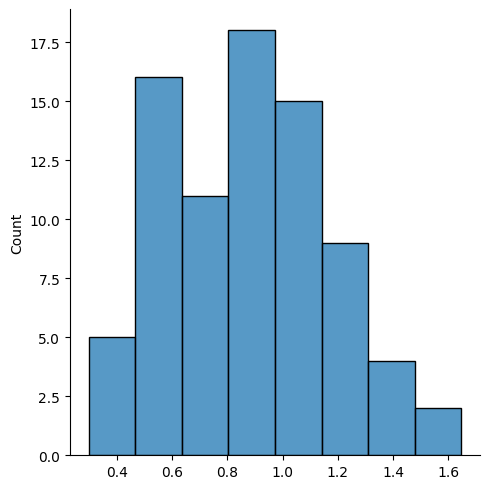

In [4]:
sns.displot(df["response_time"])